# CHAPTER 2: PROBABILITY THEORY AND DECISION MAKING
**(Week 3-4: Lecture Notes)**

---

## 1. INTRODUCTION: UNCERTAINTY AND RISK
There is never 100% certainty in engineering projects.
*   Will the bridge withstand the wind load?
*   When will the circuit fail?
*   Will the software crash under heavy traffic?

These are all **"Random (Stochastic) Events"**.

**Probability Theory** helps us manage this uncertainty by assigning a value between 0 and 1.
*   **0:** Impossible.
*   **1:** Certain.


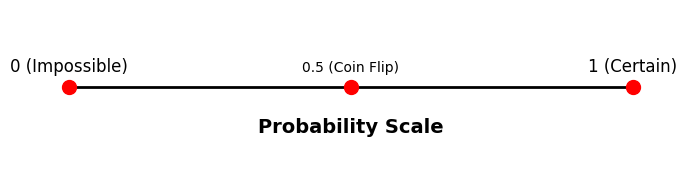

In [1]:
import matplotlib.pyplot as plt

# Probability Scale Visualization
plt.figure(figsize=(8, 2))
plt.plot([0, 1], [0, 0], color='black', linewidth=2)
plt.scatter([0, 0.5, 1], [0, 0, 0], color='red', s=100, zorder=5)

plt.text(0, 0.1, "0 (Impossible)", ha='center', fontsize=12)
plt.text(1, 0.1, "1 (Certain)", ha='center', fontsize=12)
plt.text(0.5, 0.1, "0.5 (Coin Flip)", ha='center', fontsize=10)
plt.text(0.5, -0.3, "Probability Scale", ha='center', fontsize=14, fontweight='bold')

plt.ylim(-0.5, 0.5)
plt.axis('off')
plt.show()


## 2. BASIC CONCEPTS AND SET THEORY
To understand probability, we first define the "Universe".

### 2.1. Sample Space (S)
The set of all possible outcomes.
*   *Example (Coin):* $S = \{ Heads, Tails \}$
*   *Example (Dice):* $S = \{ 1, 2, 3, 4, 5, 6 \}$
*   *Example (Production):* $S = \{ Good, Defective \}$

### 2.2. Event (A, B, C...)
A subset of the sample space we are interested in.
*   *Example:* Rolling an even number. $A = \{ 2, 4, 6 \}$

### 2.3. Set Operations
1.  **Union (U):** "A OR B". (At least one happens).
    *   $A \cup B$
2.  **Intersection ($\cap$):** "A AND B". (Both happen).
    *   $A \cap B$
3.  **Complement ($A'$):** "NOT A".
    *   $A'$ or $A^c$


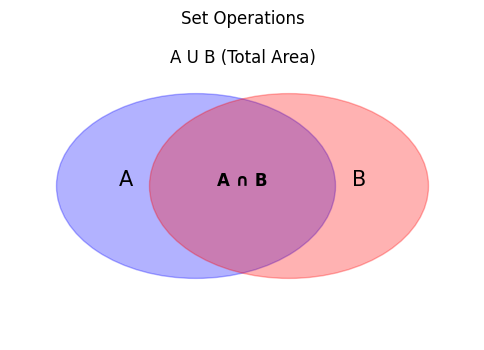

In [2]:
import matplotlib.pyplot as plt

# Venn Diagram
fig, ax = plt.subplots(figsize=(6, 4))

circle_a = plt.Circle((0.4, 0.5), 0.3, color='blue', alpha=0.3, label='A')
circle_b = plt.Circle((0.6, 0.5), 0.3, color='red', alpha=0.3, label='B')

ax.add_patch(circle_a)
ax.add_patch(circle_b)

ax.text(0.25, 0.5, "A", fontsize=15, ha='center')
ax.text(0.75, 0.5, "B", fontsize=15, ha='center')
ax.text(0.5, 0.5, "A ∩ B", fontsize=12, ha='center', fontweight='bold')
ax.text(0.5, 0.9, "A U B (Total Area)", fontsize=12, ha='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title("Set Operations")
plt.show()


## 3. AXIOMS OF PROBABILITY
Three fundamental rules:

*   **Rule 1:** $0 \le P(A) \le 1$
*   **Rule 2:** $P(S) = 1$ (Total probability is 100%)
*   **Rule 3 (Addition Rule):** If events are **Disjoint** (Mutually Exclusive), just sum them up.
    *   $P(A \cup B) = P(A) + P(B)$

### 3.1. General Addition Rule
If events intersect, we must subtract the double-counted part.

**Formula:** $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

---
**Example:** Class stats:
*   50% speak English. $P(E) = 0.50$
*   40% speak German. $P(G) = 0.40$
*   20% speak both. $P(E \cap G) = 0.20$

**Q:** Probability of speaking English OR German?

**Sol:** $0.50 + 0.40 - 0.20 = 0.70$ (70%)


In [3]:
# Data
p_eng = 0.50
p_ger = 0.40
p_both = 0.20

# Calculation
p_or = p_eng + p_ger - p_both

print(f"English OR German: {p_or*100}%")


English OR German: 70.0%


## 4. CONDITIONAL PROBABILITY
This is crucial for engineering. It means "Updating probability based on new info".

**Definition:** Probability of A given B has occurred. ($P(A | B)$)

**Formula:** $$P(A | B) = \frac{P(A \cap B)}{P(B)}$$

---
**Example (Quality Control):**
*   5% Paint Defect (B).
*   10% Size Defect (E).
*   2% BOTH defects ($B \cap E$).

**Q:** We know a part has a **Paint Defect**. What is the chance it also has a Size Defect?

**Sol:**
$P(E | B) = 0.02 / 0.05 = 0.40$ (40%)

*Note: The probability jumped from 10% to 40% because we have extra info.*


In [4]:
# Given
p_paint_error = 0.05
p_intersection = 0.02

# Conditional: P(Size | Paint)
p_cond = p_intersection / p_paint_error

print(f"Probability of Size Defect given Paint Defect: {p_cond*100}%")


Probability of Size Defect given Paint Defect: 40.0%


## 5. INDEPENDENCE
Two events are **Independent** if knowing one doesn't change the probability of the other.

**Test:** If $P(A | B) = P(A)$, they are independent.

**Multiplication Rule (Only for Independent Events):**
$$P(A \cap B) = P(A) \times P(B)$$

---
**Example (Redundancy):**
Plane has 2 engines. Failure rate for each is 0.001 (Independent).
*   Chance of BOTH failing:
*   $0.001 \times 0.001 = 0.000001$ (1 in a million).


In [5]:
p_fail = 0.001

# Independent events -> Multiply
p_total_fail = p_fail * p_fail

print(f"Single Engine Failure: {p_fail}")
print(f"Total System Failure:  {p_total_fail:.6f}")


Single Engine Failure: 0.001
Total System Failure:  0.000001


## 6. BAYES' THEOREM
Going from "Result" back to "Cause".

**Formula:**
$$P(B_k | A) = \frac{P(A | B_k) \cdot P(B_k)}{P(A)}$$

---
**Example: Which Supplier?**
*   **Supplier 1 (T1):** 60% volume, 1% defect rate.
*   **Supplier 2 (T2):** 40% volume, 2% defect rate.

**Event:** We picked a part and it is **DEFECTIVE**.
**Q:** Probability it came from T2?

**Step 1: Total Defect Probability (Denominator)**
$P(D) = (0.60 \times 0.01) + (0.40 \times 0.02) = 0.014$

**Step 2: Bayes**
$P(T2 | D) = \frac{0.40 \times 0.02}{0.014} \approx 0.57$ (57%)

*Interpretation: T2 is more likely to be the culprit.*


Total Defect Rate: 0.0140
Probability (T2 | Defective): 57.14%


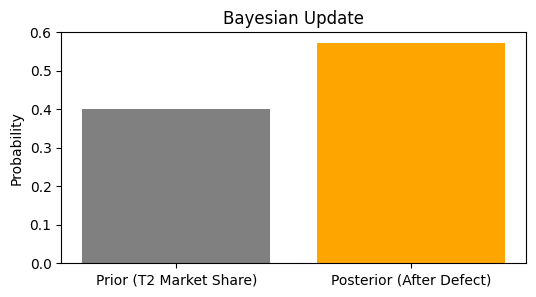

In [6]:
import matplotlib.pyplot as plt

# Data
p_t1 = 0.60
p_t2 = 0.40
p_def_t1 = 0.01
p_def_t2 = 0.02

# 1. Total Defect
p_total_def = (p_t1 * p_def_t1) + (p_t2 * p_def_t2)

# 2. Bayes (Posterior)
p_t2_given_def = (p_t2 * p_def_t2) / p_total_def

print(f"Total Defect Rate: {p_total_def:.4f}")
print(f"Probability (T2 | Defective): {p_t2_given_def*100:.2f}%")

# Plot
plt.figure(figsize=(6, 3))
plt.bar(['Prior (T2 Market Share)', 'Posterior (After Defect)'], [p_t2, p_t2_given_def], color=['gray', 'orange'])
plt.title("Bayesian Update")
plt.ylabel("Probability")
plt.show()


## 7. EXPECTED VALUE (E[X])
The average outcome in the long run.

**Formula:** $E[X] = \sum [ x \cdot P(x) ]$

---
**Decision Example:**
1.  **Risky (A):** 20% chance to win 1M TL. ($E[A] = 200k$)
2.  **Safe (B):** 80% chance to win 200k TL. ($E[B] = 160k$)

Mathematically, **A** is better. But in real life, variance (risk) matters too.


In [7]:
# Strategy A
ev_a = 1000000 * 0.20

# Strategy B
ev_b = 200000 * 0.80

print(f"Expected Value A: {ev_a}")
print(f"Expected Value B: {ev_b}")


Expected Value A: 200000.0
Expected Value B: 160000.0


## 8. Lecture Summary
1.  **OR vs AND:** "OR" $\rightarrow$ Sum (+). "AND" $\rightarrow$ Multiply ($\times$).
2.  **Given That:** Use $P(A|B)$. Known event goes to denominator.
3.  **Bayes:** Draw a tree diagram first.
